# Execução do notebook de pre-processamento

Essa execução irá carregar aqui todas as importações e variaveis de ambiente criadas no notebook **preprocessing.ipynb**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

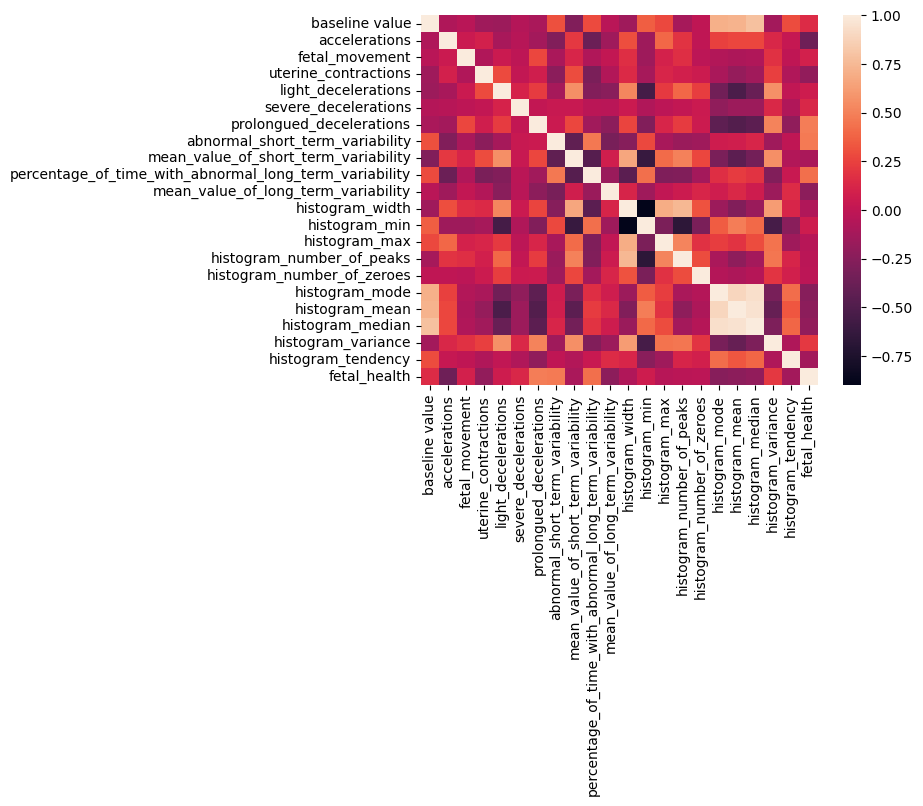

In [1]:
%run preprocessing.ipynb

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score, make_scorer, precision_score, recall_score, accuracy_score

In [3]:
X

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,64.0,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,130.0,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,130.0,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,117.0,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,117.0,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,...,40.0,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,...,66.0,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,...,67.0,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,...,66.0,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0


In [4]:
y

0       2.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
2121    2.0
2122    2.0
2123    2.0
2124    2.0
2125    1.0
Name: fetal_health, Length: 2113, dtype: float64

In [5]:
fetal_health_corr = fetal_health.corr().abs().fetal_health
cols_drops = (fetal_health_corr[fetal_health_corr < 0.08]).index
cols_drops

Index(['light_decelerations', 'histogram_width', 'histogram_min',
       'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes'],
      dtype='object')

In [6]:
X_train.drop(columns=cols_drops, inplace=True)
X_test.drop(columns=cols_drops, inplace=True)

### Criamos e treinamos nosso modelo de regressao logistica para o target fetal_health

In [7]:
fetal_health_model = LogisticRegression(max_iter=10000)
fetal_health_model.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

### Realizamos o teste

In [8]:
y_pred_fetal_health = fetal_health_model.predict(X_test)

In [9]:
#Intercepto
fetal_health_model.intercept_

array([12.03605922, -4.18514812, -7.85091111])

In [10]:
#Coeficientes
fetal_health_model.coef_

array([[-1.99239307e-01,  1.81136340e-01, -1.25899845e+00,
         1.78063648e-01, -2.95586426e-04, -2.49521724e-02,
        -7.42065891e-02,  9.18553022e-01, -4.71852934e-02,
        -1.21337458e-01,  3.97615578e-03,  5.56667954e-02,
         1.04102007e-01, -2.89955989e-02,  6.29581076e-02],
       [-8.25781590e-02, -1.76716669e-01,  4.63530460e-01,
        -1.31094001e-01, -2.17666391e-04,  1.26362857e-02,
        -7.15426377e-03, -3.09726548e-01,  4.64836089e-04,
         3.55573396e-03, -2.99456720e-04,  4.41480573e-02,
         7.78236309e-02, -2.41402187e-03, -1.88460611e-02],
       [ 2.81817466e-01, -4.41967132e-03,  7.95467995e-01,
        -4.69696474e-02,  5.13252817e-04,  1.23158868e-02,
         8.13608529e-02, -6.08826474e-01,  4.67204573e-02,
         1.17781724e-01, -3.67669906e-03, -9.98148527e-02,
        -1.81925638e-01,  3.14096207e-02, -4.41120465e-02]])

### Avaliação: Matriz de confusão e métricas para o dataset

              precision    recall  f1-score   support

         1.0       0.91      0.95      0.93       330
         2.0       0.61      0.47      0.53        58
         3.0       0.82      0.77      0.79        35

    accuracy                           0.87       423
   macro avg       0.78      0.73      0.75       423
weighted avg       0.86      0.87      0.87       423



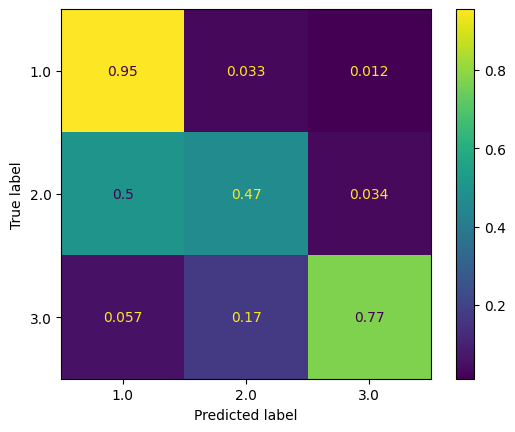

In [11]:
print_report(fetal_health_model,X_test, y_test, normalize='true')

In [12]:
# Estimativa da acurácia no conjunto de teste
predictions = fetal_health_model.predict(X_test)
print("Accuracy score = ", accuracy_score(y_test, y_pred_fetal_health))

Accuracy score =  0.8723404255319149


### Matriz de confusão percentual

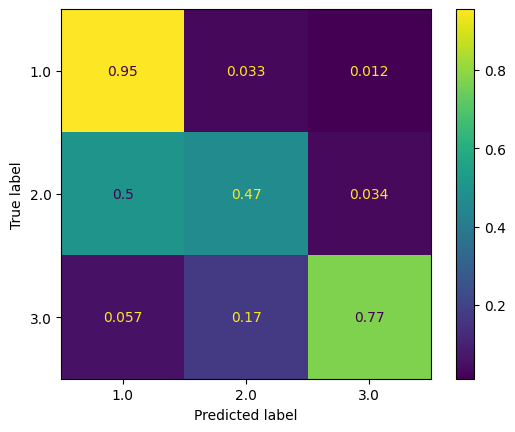

In [13]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_fetal_health,normalize='true');

In [14]:
# Padronização do dataset
from sklearn.preprocessing import StandardScaler
pipelines =Pipeline([('Scaler', StandardScaler()), ('LR', LogisticRegression(max_iter=10000))])

In [15]:
from sklearn.model_selection import KFold
spliter = KFold(n_splits=10, shuffle=True, random_state=42)
score = make_scorer(recall_score, labels=[2, 3], average="micro")

In [16]:
# Cria um conjunto de hiperparametros a serem testados
param_grid = {
    'LR__C': np.logspace(-5, 8, 15),
    'LR__penalty': ['l1', 'l2'], 
    'LR__solver': ['lbfgs','liblinear','saga'],
    'LR__multi_class': ['auto','ovr','multinomial'],
}

In [17]:
# Instancia GridSearchCV
from sklearn.model_selection import GridSearchCV
logit_cv = GridSearchCV(estimator=pipelines, param_grid=param_grid,cv=spliter,scoring=score,n_jobs=-1)

In [18]:
logit_cv.fit(X_train, y_train)

/home/gabriel-monteiro/workspace/lets-code/lets-code-analytics-modulo-4/.venv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
900 fits failed out of a total of 1800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
450 fits failed with the following error:
Traceback (most recent call last):
  File "/home/gabriel-monteiro/workspace/lets-code/lets-code-analytics-modulo-4/.venv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/gabriel-monteiro/workspace/lets-code/lets-code-analytics-modulo-4/.venv/lib/python3.10/site-packages/sklearn/pipeline.py", line 382, in fit
    self._final_estimato

GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('Scaler', StandardScaler()),
                                       ('LR',
                                        LogisticRegression(max_iter=10000))]),
             n_jobs=-1,
             param_grid={'LR__C': array([1.00000000e-05, 8.48342898e-05, 7.19685673e-04, 6.10540230e-03,
       5.17947468e-02, 4.39397056e-01, 3.72759372e+00, 3.16227766e+01,
       2.68269580e+02, 2.27584593e+03, 1.93069773e+04, 1.63789371e+05,
       1.38949549e+06, 1.17876863e+07, 1.00000000e+08]),
                         'LR__multi_class': ['auto', 'ovr', 'multinomial'],
                         'LR__penalty': ['l1', 'l2'],
                         'LR__solver': ['newton-cg', 'lbfgs']},
             scoring=make_scorer(recall_score, labels=[2, 3], average=micro))

              precision    recall  f1-score   support

         1.0       0.95      0.96      0.95      1316
         2.0       0.68      0.67      0.68       234
         3.0       0.84      0.80      0.82       140

    accuracy                           0.90      1690
   macro avg       0.82      0.81      0.82      1690
weighted avg       0.90      0.90      0.90      1690



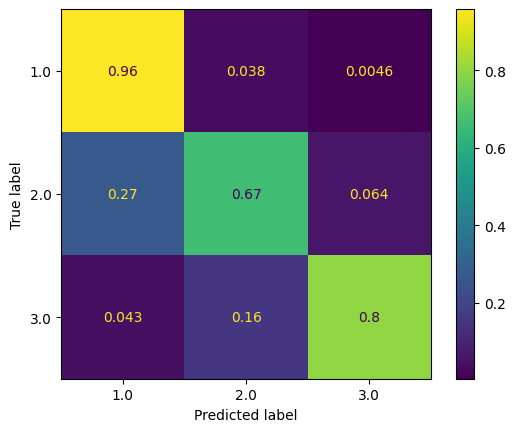

In [19]:
print_report(logit_cv,X_train, y_train, normalize='true')

              precision    recall  f1-score   support

         1.0       0.93      0.96      0.94       330
         2.0       0.65      0.57      0.61        58
         3.0       0.87      0.77      0.82        35

    accuracy                           0.89       423
   macro avg       0.81      0.77      0.79       423
weighted avg       0.88      0.89      0.89       423



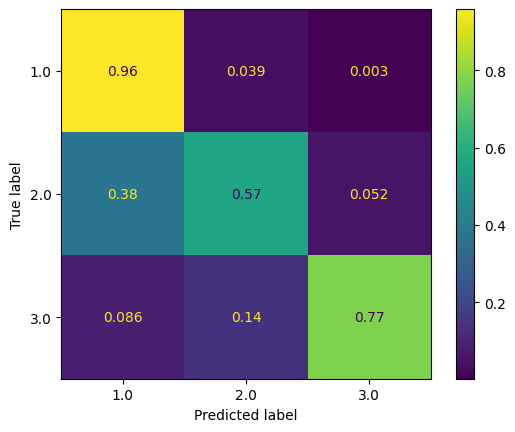

In [20]:
print_report(logit_cv,X_test, y_test, normalize='true')